In [35]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [36]:
###load data first
#E1 data
features = np.loadtxt("features_all.txt", delimiter=",")
labels = np.loadtxt("labels_all.txt", delimiter=",")
#E2data
#features = np.loadtxt("features_all_2.txt", delimiter=",")
#labels = np.loadtxt("labels_all_2.txt", delimiter=",")
x_all = features
y_all = labels
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, random_state = 1234)

### define result function to output accuracy and plot ROC

In [3]:
def result(y_test,predicted):
    con_mat = confusion_matrix(y_test, predicted)
    print("Confusion Matrix is: ", con_mat)
    print("Prediction Accuracy is: ", round(np.trace(con_mat)/np.sum(con_mat),6))
    #ROC curve
    fpr, tpr, threshold = roc_curve(y_test, predicted)
    roc_auc = auc(fpr, tpr)

    # method I: plt

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Naive Bayes

In [ ]:
model = MultinomialNB(alpha=1)

#model.fit(Xtrain, ytrain)
# Train the model using the training sets 
#print(round(np.mean(cross_val_score(model, x_all, y_all, cv=5)),6))
model.fit(x_train, y_train)
#Predict Output 
predicted = model.predict(x_test)
#print(predicted)
result(y_test = y_test, predicted = predicted)

### Normalized data 

In [37]:
# normalize
x_all = (x_all - x_all.min(0)) / x_all.ptp(0)
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, random_state = 1234)

### PCA + Naive Bayes

PCA with n = 2, Testing Accuracy is: 0.584359
PCA with n = 3, Testing Accuracy is: 0.593129
PCA with n = 4, Testing Accuracy is: 0.599807
PCA with n = 5, Testing Accuracy is: 0.613646
PCA with n = 6, Testing Accuracy is: 0.753399
PCA with n = 7, Testing Accuracy is: 0.76756
PCA with n = 8, Testing Accuracy is: 0.764985
PCA with n = 9, Testing Accuracy is: 0.762571
PCA with n = 10, Testing Accuracy is: 0.766836
PCA with n = 11, Testing Accuracy is: 0.766916
PCA with n = 12, Testing Accuracy is: 0.762974
PCA with n = 13, Testing Accuracy is: 0.763215
PCA with n = 14, Testing Accuracy is: 0.783732
PCA with n = 15, Testing Accuracy is: 0.783088
PCA with n = 16, Testing Accuracy is: 0.786226
PCA with n = 17, Testing Accuracy is: 0.786709
PCA with n = 18, Testing Accuracy is: 0.788639
PCA with n = 19, Testing Accuracy is: 0.778824
PCA with n = 20, Testing Accuracy is: 0.775284
PCA with n = 21, Testing Accuracy is: 0.785341
PCA with n = 22, Testing Accuracy is: 0.784536
PCA with n = 23, Testi

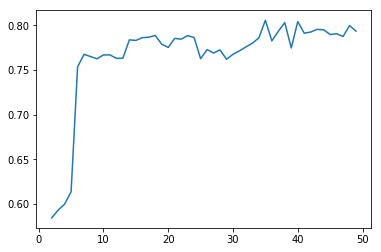

In [16]:
acc_tol = []
for n in range(2,50,1):
    model = PCA(n_components = n, random_state = 1234)
    model.fit(x_train)
    x_train_pca = model.transform(x_train)
    model = PCA(n_components=n)
    model.fit(x_test)
    x_test_pca = model.transform(x_test)
    model = GaussianNB()
    model.fit(x_train_pca, y_train)
    #Predict Output
    predicted = model.predict(x_test_pca)
    con_mat = confusion_matrix(y_test, predicted)
    acc = np.trace(con_mat)/np.sum(con_mat)
    print("PCA with n = {}, Testing Accuracy is: {}".format(n, round(acc,6)))
    #print("Confusion Matrix is: ", con_mat)
    acc_tol.append(acc)
    
acc_tol = np.array(acc_tol)
print("Maximum is: {}, with n = {}".format(round(np.max(acc_tol),6),np.argmax(acc_tol)+2))
plt.plot(range(2,50,1),acc_tol)
plt.show()

### Random Forest

Random Forest with n = 64, Testing Accuracy is: 0.979731
Random Forest with n = 65, Testing Accuracy is: 0.980337
Random Forest with n = 66, Testing Accuracy is: 0.980095
Random Forest with n = 67, Testing Accuracy is: 0.980337
Random Forest with n = 68, Testing Accuracy is: 0.979852
Random Forest with n = 69, Testing Accuracy is: 0.98058
Random Forest with n = 70, Testing Accuracy is: 0.979973
Random Forest with n = 71, Testing Accuracy is: 0.980702
Random Forest with n = 72, Testing Accuracy is: 0.980095
Random Forest with n = 73, Testing Accuracy is: 0.980823
Random Forest with n = 74, Testing Accuracy is: 0.980459
Random Forest with n = 75, Testing Accuracy is: 0.981066
Random Forest with n = 76, Testing Accuracy is: 0.980944
Random Forest with n = 77, Testing Accuracy is: 0.981308
Random Forest with n = 78, Testing Accuracy is: 0.980702
Random Forest with n = 79, Testing Accuracy is: 0.981673
Random Forest with n = 80, Testing Accuracy is: 0.981187
Random Forest with n = 81, Testi

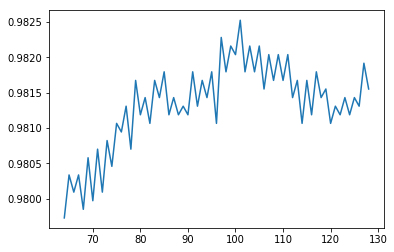

In [31]:
acc_tol = []
for n in range(64,129,1):
    model = RandomForestClassifier(n_estimators = n, random_state = 1234)
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    con_mat = confusion_matrix(y_test, predicted)
    acc = np.trace(con_mat)/np.sum(con_mat)
    print("Random Forest with n = {}, Testing Accuracy is: {}".format(n, round(acc,6)))
    #print("Confusion Matrix is: ", con_mat)
    acc_tol.append(acc)

acc_tol = np.array(acc_tol)    
#print("Maximum is: {}, with n = {}".format(round(np.max(acc_tol),6),np.argmax(acc_tol)+2))
plt.plot(range(64,129,1),acc_tol)
plt.show()

#Predict Output 
#predicted = model.predict(x_test)
#print(predicted)
#result(y_test = y_test, predicted = predicted)

### Decision Tree

Confusion Matrix is:  [[6213 1019]
 [1057 4140]]
Prediction Accuracy is:  0.832971


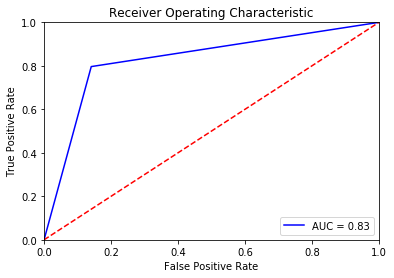

In [39]:
model = DecisionTreeClassifier(criterion = 'entropy',random_state = 1234)
model.fit(x_train, y_train)

#Predict Output 
predicted = model.predict(x_test)
#print(predicted)
result(y_test = y_test, predicted = predicted)

### K Nearest Neighbors

In [33]:
methods = ["manhattan", "euclidean"]
for k in range(2,10):
    for method in methods:
        model = KNeighborsClassifier(n_neighbors = k, metric = method)
        model.fit(x_train, y_train)
        #Predict Output 
        predicted = model.predict(x_test)
        #print(predicted)
        con_mat = confusion_matrix(y_test, predicted)
        #print("Confusion Matrix is: ", con_mat)
        print("Method: {}, k = {}, Prediction Accuracy is:{}".format(method, k, round(np.trace(con_mat)/np.sum(con_mat),6)))

Method: manhattan, k = 2, Prediction Accuracy is:0.974754
Method: euclidean, k = 2, Prediction Accuracy is:0.979731
Method: manhattan, k = 3, Prediction Accuracy is:0.979366
Method: euclidean, k = 3, Prediction Accuracy is:0.985071
Method: manhattan, k = 4, Prediction Accuracy is:0.975968
Method: euclidean, k = 4, Prediction Accuracy is:0.979731
Method: manhattan, k = 5, Prediction Accuracy is:0.978153
Method: euclidean, k = 5, Prediction Accuracy is:0.981915
Method: manhattan, k = 6, Prediction Accuracy is:0.973783
Method: euclidean, k = 6, Prediction Accuracy is:0.978881
Method: manhattan, k = 7, Prediction Accuracy is:0.974997
Method: euclidean, k = 7, Prediction Accuracy is:0.980702
Method: manhattan, k = 8, Prediction Accuracy is:0.971113
Method: euclidean, k = 8, Prediction Accuracy is:0.976939
Method: manhattan, k = 9, Prediction Accuracy is:0.972084
Method: euclidean, k = 9, Prediction Accuracy is:0.97876


Confusion Matrix is:  [[6862  370]
 [ 521 4676]]
Prediction Accuracy is:  0.928313


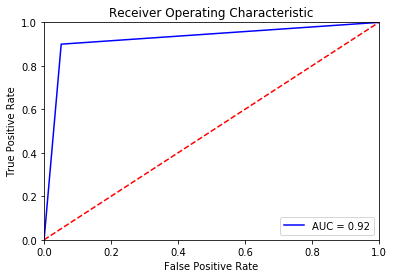

In [38]:
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(x_train, y_train)

#Predict Output 
predicted = model.predict(x_test)
#print(predicted)
result(y_test = y_test, predicted = predicted)